In [1]:
import ball_functions as f
from IPython.display import clear_output, display, HTML 
from ipywidgets import interact, interactive  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Swarming Model

In [2]:
a,b,c = f.main()

#np.shape(a)
#f.scatter_t(a,b,c,-1)

In [3]:
def plot_temp(t):
    f.scatter_t(a,b,c,t)
    
interact(plot_temp, t=(0,a.shape[0]-1,1))

interactive(children=(IntSlider(value=99, description='t', max=199), Output()), _dom_classes=('widget-interact…

<function __main__.plot_temp(t)>

# Collision Model

In [1]:
# collisions animation
def update(t,dynamic,scatter):
    x,y,theta = next(dynamic)
    scatter.set_data([x,y])
    return scatter,

t = np.linspace(0, 4, 100)
dynamic = f.dynamic_gen()
x,y,theta = next(dynamic)

fig, ax = plt.subplots(1,1,figsize=(8,8))
scatter, = ax.plot(x,y,'ob',ms=5)
ax.set_xlim(0,10); ax.set_ylim(0,10)

ani = FuncAnimation(fig, update, frames=t, fargs=(dynamic,scatter), repeat=False,cache_frame_data=False)
ani.save('try.gif', writer='imagemagick')

NameError: name 'np' is not defined

# use

In [1]:
import ball_functions as f
from IPython.display import clear_output, display, HTML 
from ipywidgets import interact, interactive  
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
dynamic = f.dynamic_gen()

def plot_temp(t):
    x,y,th = next(dynamic)
    f.scatter(x,y,th)
    
interact(plot_temp, t=(0,10,0.001))

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0, step=0.001), Output()), _dom_classes=(…

<function __main__.plot_temp(t)>

In [ ]:
dynamic = f.dynamic_gen_periodic()

def plot_temp(t):
    x,y = next(dynamic)
    f.scatter_period(x,y)
    
interact(plot_temp, t=(0,1,0.001))

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.001), Output()), _dom_classes=('…

<function __main__.plot_temp(t)>

In [6]:
import numpy as np
import math

def dynamic_gen():
    # Simulation parameters
    v0 = 100.0  # velocity
    eta = 0.5  # random fluctuation in angle (in radians)
    L = 100    # size of box
    R = 5      # interaction radius
    dt = 0.01   # time step
    N = 10      # number of balls

    # Initial positions and velocities
    x, y = np.random.uniform(low=0, high=L, size=(2, N))
    v0x, v0y = v0 * np.random.uniform(low=-1, high=1, size=(2, N))
    #v0x, v0y = v0 * np.random.choice([1, 1], size=(2, N))
    theta = 2 * np.pi * np.random.rand(N)

    yield x, y, theta

    r = 30
    k = 30

    vx = v0x
    vy = v0y

    while True:
        noisex = 1 * (np.random.rand(N) - 0.5)
        noisey = 1 * (np.random.rand(N) - 0.5)

        dx = x[:, None] - x[None, :]
        dy = y[:, None] - y[None, :]
        dr = np.hypot(dx, dy)
        dr = np.ma.masked_where(~((0 < dr) & (dr < r)), dr)

        force = k * (2 * r - dr)
        vx += np.ma.sum(force * dx / dr, axis=1) * dt
        vy += np.ma.sum(force * dy / dr, axis=1) * dt

        # Apply boundary conditions
        for i in range(N):
            if x[i] + vx[i] * dt < 0 or x[i] + vx[i] * dt > L:
                vx[i] = -vx[i]
            if y[i] + vy[i] * dt < 0 or y[i] + vy[i] * dt > L:
                vy[i] = -vy[i]

        x += vx* dt + noisex
        y += vy* dt + noisey

        yield x, y, theta

# Sample usage to visualize the particle movement
'''
N = 1  # Number of particles
gen = dynamic_gen()

fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
scatter = ax.scatter([], [], s=1000)

def update(frame):
    x, y, _ = next(gen)
    scatter.set_offsets(np.column_stack([x, y]))
    return scatter,

ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)
ani.save('nope.gif', writer='imagemagick')
plt.show()
'''

"\nN = 1  # Number of particles\ngen = dynamic_gen()\n\nfig, ax = plt.subplots()\nax.set_xlim(0, 100)\nax.set_ylim(0, 100)\nscatter = ax.scatter([], [], s=1000)\n\ndef update(frame):\n    x, y, _ = next(gen)\n    scatter.set_offsets(np.column_stack([x, y]))\n    return scatter,\n\nani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)\nani.save('nope.gif', writer='imagemagick')\nplt.show()\n"

In [7]:
dynamic = dynamic_gen()

def plot_temp(t):
    
    x,y,th = next(dynamic)
    f.scatter_period(x,y)
    
interact(plot_temp, t=(0,10,0.001))

interactive(children=(FloatSlider(value=5.0, description='t', max=10.0, step=0.001), Output()), _dom_classes=(…

<function __main__.plot_temp(t)>

In [14]:
def dynamic_gen():
    # Simulation parameters
    v0 = 10.0  # velocity
    eta = 0.5  # random fluctuation in angle (in radians)
    L = 100    # size of box
    R = 5      # interaction radius
    dt = 0.01   # time step
    N = 2      # number of balls

    # Initial positions and velocities
    x, y = np.random.uniform(low=0, high=L, size=(2, N))
    v0x, v0y = v0 * np.random.uniform(low=-1, high=1, size=(2, N))
    #v0x, v0y = v0 * np.random.choice([1, 1], size=(2, N))
    theta = 2 * np.pi * np.random.rand(N)

    #yield x, y, theta

    r = 1
    k = 30

    vx = v0x
    vy = v0y

    T = 10
    time = 0
    i = 0
    x_array = np.zeros((int(T/dt),N))
    y_array = np.zeros((int(T/dt),N))

    while time < T:
        noisex = 1 * (np.random.rand(N) - 0.5)
        noisey = 1 * (np.random.rand(N) - 0.5)

        dx = x[:, None] - x[None, :]
        dy = y[:, None] - y[None, :]
        dr = np.hypot(dx, dy)
        dr = np.ma.masked_where(~((0 < dr) & (dr < r)), dr)

        force = k * (2 * r - dr)
        vx += np.ma.sum(force * dx / dr, axis=1) * dt
        vy += np.ma.sum(force * dy / dr, axis=1) * dt

        # Apply boundary conditions
        for i in range(N):
            if x[i] + vx[i] * dt < 0 or x[i] + vx[i] * dt > L:
                vx[i] = -vx[i]
            if y[i] + vy[i] * dt < 0 or y[i] + vy[i] * dt > L:
                vy[i] = -vy[i]

        x += vx* dt + noisex
        y += vy* dt + noisey

        #print(x)
        x_array[i:,] = x
        y_array[i:,] = y


        time += dt
        i+= 1
    return x, y

In [15]:
a,b = dynamic_gen()

def plot_temp(t):
    f.scatter_t(a,b,c,t)
    
interact(plot_temp, t=(0,a.shape[0]-1,1))

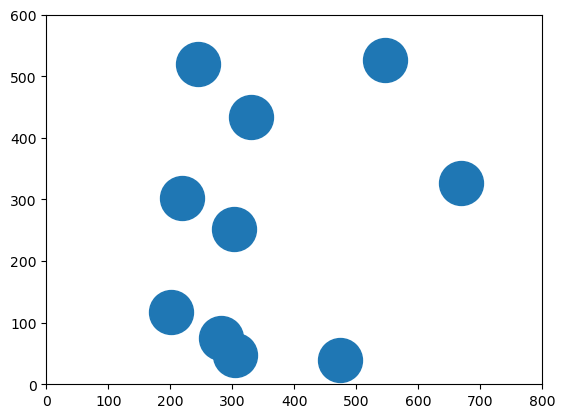

In [20]:
import random
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constants
WIDTH, HEIGHT = 800, 600
RADIUS = 30
NUM_PARTICLES = 10

class Particle:
    def __init__(self):
        self.x = random.randint(RADIUS, WIDTH - RADIUS)
        self.y = random.randint(RADIUS, HEIGHT - RADIUS)
        self.radius = RADIUS
        self.speed = 1
        self.direction = random.uniform(0, 2*math.pi)

    def update(self):
        self.x += self.speed * math.cos(self.direction)
        self.y += self.speed * math.sin(self.direction)
        self.check_boundary_collision()
        self.check_particle_collision()

    def check_boundary_collision(self):
        # Check if particle is outside the circular boundary
        distance_to_center = math.sqrt((self.x - WIDTH/2)**2 + (self.y - HEIGHT/2)**2)
        if distance_to_center + self.radius > min(WIDTH, HEIGHT) / 2:
            # Adjust position so it's inside the circle
            angle_to_center = math.atan2(self.y - HEIGHT/2, self.x - WIDTH/2)
            self.x = (min(WIDTH, HEIGHT) / 2 - self.radius) * math.cos(angle_to_center) + WIDTH/2
            self.y = (min(WIDTH, HEIGHT) / 2 - self.radius) * math.sin(angle_to_center) + HEIGHT/2

    def check_particle_collision(self):
        for particle in particles:
            if particle != self:  # Avoid self-collision check
                distance = math.sqrt((self.x - particle.x)**2 + (self.y - particle.y)**2)
                if distance <= self.radius + particle.radius:
                    # Collision detected, update directions
                    angle = math.atan2(particle.y - self.y, particle.x - self.x)
                    self.direction = angle + self.direction
                    particle.direction = angle + particle.direction

def update(frame):
    for particle in particles:
        particle.update()
    x_data = [particle.x for particle in particles]
    y_data = [particle.y for particle in particles]
    scatter.set_offsets(list(zip(x_data, y_data)))
    return scatter,

def init():
    x_data = [particle.x for particle in particles]
    y_data = [particle.y for particle in particles]
    scatter.set_offsets(list(zip(x_data, y_data)))
    return scatter,

# Create particles
particles = [Particle() for _ in range(NUM_PARTICLES)]

# Create plot
fig, ax = plt.subplots()
ax.set_xlim(0, WIDTH)
ax.set_ylim(0, HEIGHT)
scatter = ax.scatter([], [], s=1000)

# Animate
ani = FuncAnimation(fig, update, frames=300, init_func=init, blit=True, interval=10)
ani.save('xhess.gif', writer='imagemagick')
plt.show()